<a href="https://colab.research.google.com/github/keerthanarangaraju/data-Science/blob/main/H1N1_Keerthana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv',delimiter = ',')

In [ ]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
features = df.iloc[:,:-1]
labels = df.iloc[:,33]

In [ ]:
features.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


In [ ]:
labels.head()

0    0
1    0
2    0
3    0
4    0
Name: h1n1_vaccine, dtype: int64

In [ ]:
features.shape

(26707, 33)

In [ ]:
labels.shape

(26707,)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
labels.info()

<class 'pandas.core.series.Series'>
RangeIndex: 26707 entries, 0 to 26706
Series name: h1n1_vaccine
Non-Null Count  Dtype
--------------  -----
26707 non-null  int64
dtypes: int64(1)
memory usage: 208.8 KB


In [ ]:
features.duplicated().sum()

0

In [ ]:
labels.duplicated().sum()

26705

In [ ]:
features.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
labels.isnull().sum()

0

In [ ]:
features = features.fillna(features.mean())
features = round(features)
features = features.fillna('No Category')

In [ ]:
features.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [ ]:
print("h1n1_worry")
print(features.h1n1_worry.unique())

print("h1n1_awareness")
print(features.h1n1_awareness.unique())

print("antiviral_medication")
print(features.antiviral_medication.unique())

print("contact_avoidance")
print(features.contact_avoidance.unique())

print("bought_face_mask")
print(features.bought_face_mask.unique())

print("wash_hands_frequently")
print(features.wash_hands_frequently.unique())

print("avoid_large_gatherings")
print(features.avoid_large_gatherings.unique())

print("reduced_outside_home_cont")
print(features.reduced_outside_home_cont.unique())

print("avoid_touch_face")
print(features.avoid_touch_face.unique())

print("dr_recc_h1n1_vacc")
print(features.dr_recc_h1n1_vacc.unique())

print("dr_recc_seasonal_vacc")
print(features.dr_recc_seasonal_vacc.unique())

print("chronic_medic_condition")
print(features.chronic_medic_condition.unique())

print("cont_child_undr_6_mnths")
print(features.cont_child_undr_6_mnths.unique())

print("is_health_worker")
print(features.is_health_worker.unique())

print("has_health_insur")
print(features.has_health_insur.unique())

print("is_h1n1_vacc_effective")
print(features.is_h1n1_vacc_effective.unique())

print("is_h1n1_risky")
print(features.is_h1n1_risky.unique())

print("sick_from_seas_vacc")
print(features.sick_from_seas_vacc.unique())

print("is_seas_vacc_effective")
print(features.is_seas_vacc_effective.unique())

print("is_seas_risky")
print(features.is_seas_risky.unique())

print("sick_from_seas_vacc")
print(features.sick_from_seas_vacc.unique())

h1n1_worry
[1. 3. 2. 0.]
h1n1_awareness
[0. 2. 1.]
antiviral_medication
[0. 1.]
contact_avoidance
[0. 1.]
bought_face_mask
[0. 1.]
wash_hands_frequently
[0. 1.]
avoid_large_gatherings
[0. 1.]
reduced_outside_home_cont
[1. 0.]
avoid_touch_face
[1. 0.]
dr_recc_h1n1_vacc
[0. 1.]
dr_recc_seasonal_vacc
[0. 1.]
chronic_medic_condition
[0. 1.]
cont_child_undr_6_mnths
[0. 1.]
is_health_worker
[0. 1.]
has_health_insur
[1. 0.]
is_h1n1_vacc_effective
[3. 5. 4. 2. 1.]
is_h1n1_risky
[1. 4. 3. 2. 5.]
sick_from_seas_vacc
[2. 4. 1. 5. 3.]
is_seas_vacc_effective
[2. 4. 5. 3. 1.]
is_seas_risky
[1. 2. 4. 3. 5.]
sick_from_seas_vacc
[2. 4. 1. 5. 3.]


In [ ]:
print("age_bracket")
print(features.age_bracket.unique())

print("qualification")
print(features.qualification.unique())

print("race")
print(features.race.unique())

print("income_level")
print(features.income_level.unique())

print("marital_status")
print(features.marital_status.unique())

print("housing_status")
print(features.housing_status.unique())

print("employment")
print(features.employment.unique())

print("census_msa")
print(features.census_msa.unique())

age_bracket
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
qualification
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'No Category']
race
['White' 'Black' 'Other or Multiple' 'Hispanic']
income_level
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'No Category']
marital_status
['Not Married' 'Married' 'No Category']
housing_status
['Own' 'Rent' 'No Category']
employment
['Not in Labor Force' 'Employed' 'Unemployed' 'No Category']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [ ]:
from sklearn import preprocessing
obj=preprocessing.LabelEncoder()
enc=obj

In [ ]:
features.age_bracket = enc.fit_transform(features.age_bracket)
features.qualification = enc.fit_transform(features.qualification)
features.race = enc.fit_transform(features.race)
features.sex = enc.fit_transform(features.sex)
features.income_level = enc.fit_transform(features.income_level)
features.marital_status = enc.fit_transform(features.marital_status)
features.housing_status = enc.fit_transform(features.housing_status)
features.employment = enc.fit_transform(features.employment)
features.census_msa = enc.fit_transform(features.census_msa)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [ ]:
features.head(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,3,0,2,2,1,2,2,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,3,1,2,2,2,0,0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,3,1,0,2,1,0,0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,3,0,2,2,2,2,1,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,4,3,0,0,0,1,0,0,1.0,0.0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,3,1,0,0,1,0,1,2.0,3.0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,1,0,2,1,0,0,0.0,0.0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,4,3,0,0,0,1,0,2,2.0,0.0
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,2,3,1,1,0,1,0,0,1.0,0.0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,3,1,0,2,1,2,0,0.0,0.0


In [ ]:
features.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,...,2.057513,2.570300,0.406223,0.953795,0.932190,1.145542,0.984161,0.833489,0.887558,0.538922
std,7709.791156,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,...,1.435626,0.923226,0.491136,1.113444,0.970936,0.526582,1.052723,0.823313,0.749980,0.924918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000


In [ ]:
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)

In [ ]:
print(len(findoutliers(features.no_of_adults)))
print(len(findoutliers(features.no_of_children)))

1125
1747


In [ ]:
findoutliers(features.no_of_adults)

array([3., 3., 3., ..., 3., 3., 3.])

In [ ]:
findoutliers(features.no_of_children)

array([3., 3., 3., ..., 3., 3., 3.])

<Axes: >

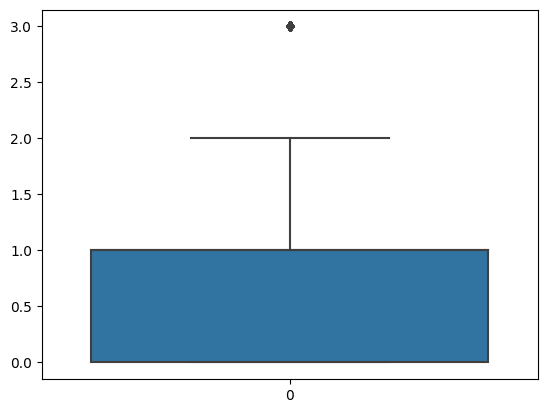

In [ ]:
sns.boxplot(features.no_of_adults)

<Axes: >

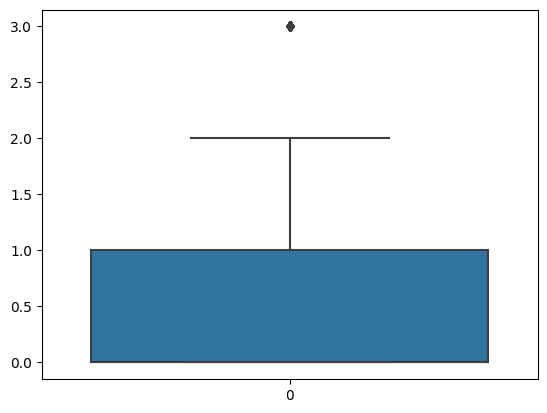

In [ ]:
sns.boxplot(features.no_of_children)

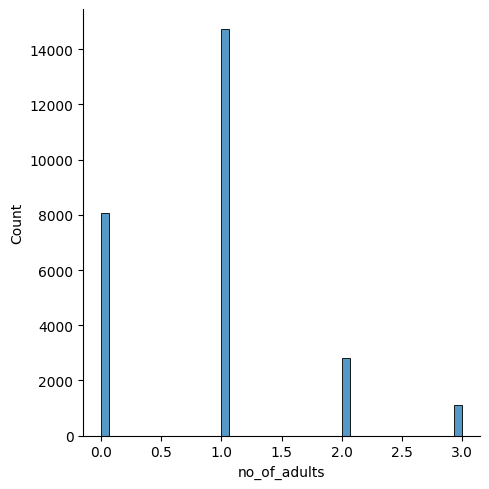

In [ ]:
sns.displot(features.no_of_adults)

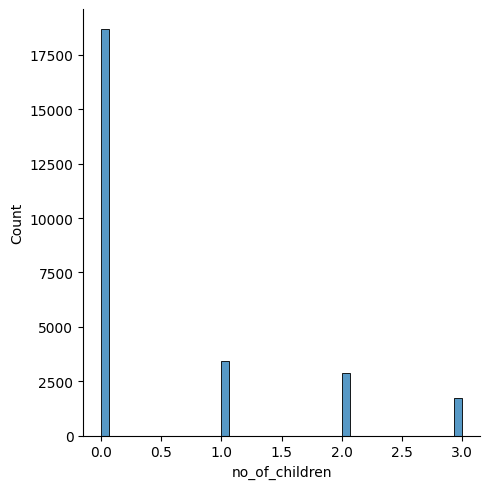

In [ ]:
sns.displot(features.no_of_children)

In [ ]:
features.h1n1_worry.value_counts()

2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

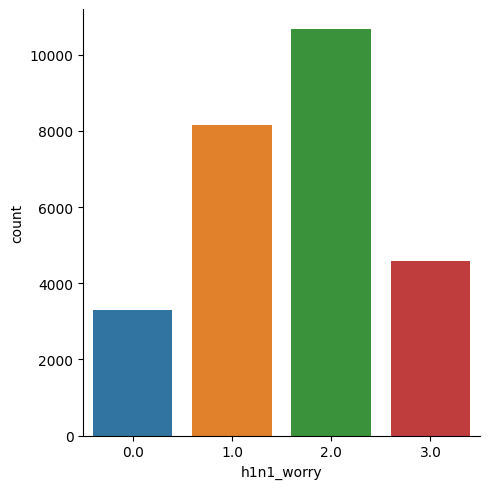

In [ ]:
sns.catplot(x='h1n1_worry',kind='count',data=features)

In [ ]:
features.h1n1_awareness.value_counts()

1.0    14714
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

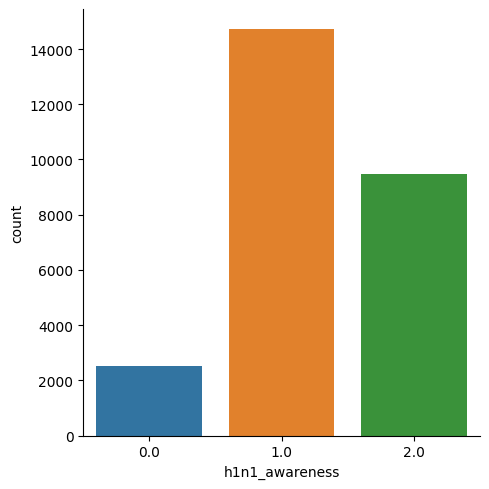

In [ ]:
sns.catplot(x='h1n1_awareness',kind='count',data=features)

In [ ]:
features.antiviral_medication.value_counts()

0.0    25406
1.0     1301
Name: antiviral_medication, dtype: int64

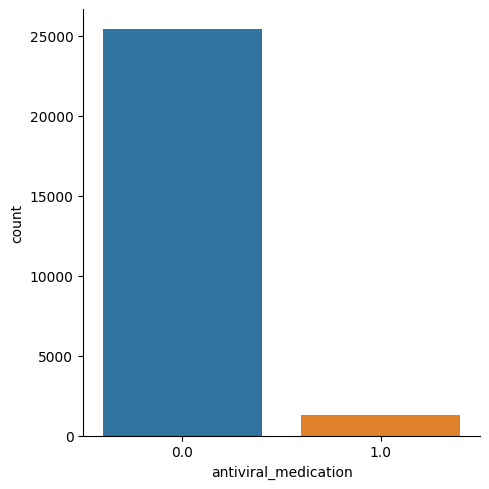

In [ ]:
sns.catplot(x='antiviral_medication',kind='count',data=features)

In [ ]:
features.contact_avoidance.value_counts()

1.0    19436
0.0     7271
Name: contact_avoidance, dtype: int64

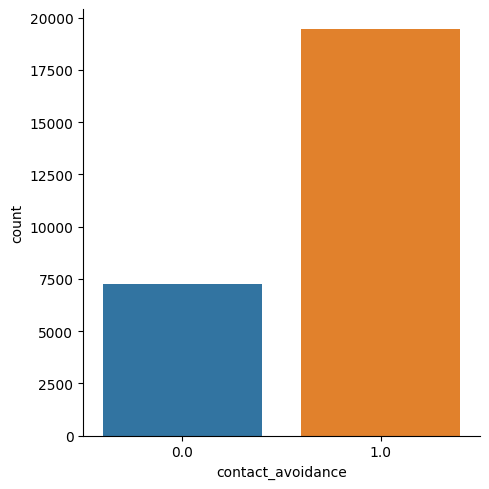

In [ ]:
sns.catplot(x='contact_avoidance',kind='count',data=features)

In [ ]:
features.bought_face_mask.value_counts()

0.0    24866
1.0     1841
Name: bought_face_mask, dtype: int64

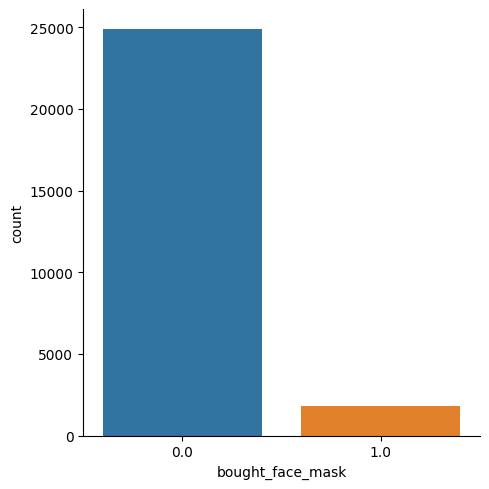

In [ ]:
sns.catplot(x='bought_face_mask',kind='count',data=features)

In [ ]:
features.wash_hands_frequently.value_counts()

1.0    22057
0.0     4650
Name: wash_hands_frequently, dtype: int64

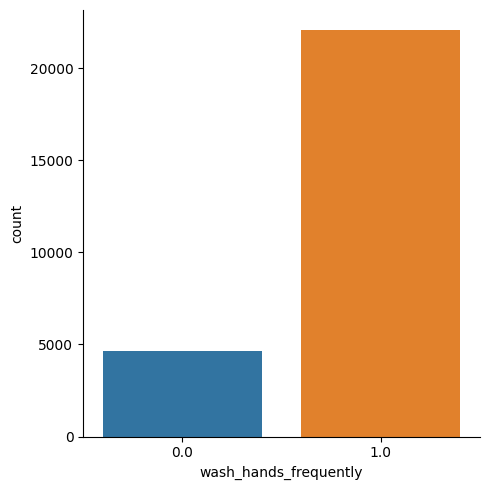

In [ ]:
sns.catplot(x='wash_hands_frequently',kind='count',data=features)

In [ ]:
features.avoid_large_gatherings.value_counts()

0.0    17160
1.0     9547
Name: avoid_large_gatherings, dtype: int64

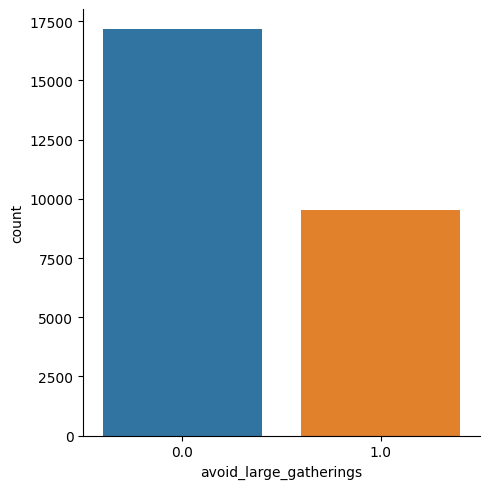

In [ ]:
sns.catplot(x='avoid_large_gatherings',kind='count',data=features)

In [ ]:
features.reduced_outside_home_cont.value_counts()

0.0    17726
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

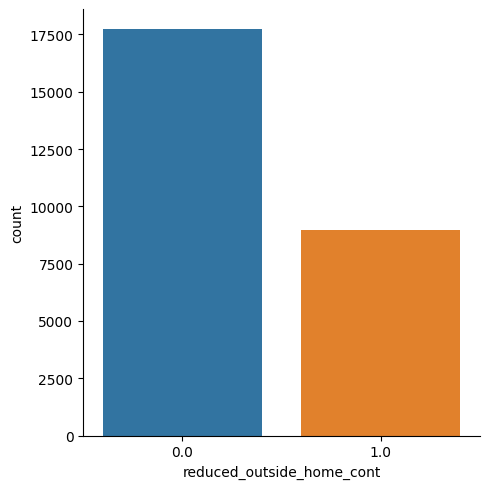

In [ ]:
sns.catplot(x='reduced_outside_home_cont',kind='count',data=features)

In [ ]:
features.avoid_touch_face.value_counts()

1.0    18129
0.0     8578
Name: avoid_touch_face, dtype: int64

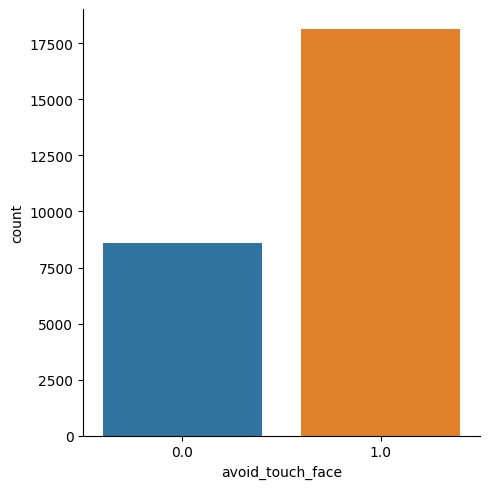

In [ ]:
sns.catplot(x='avoid_touch_face',kind='count',data=features)

In [ ]:
features.dr_recc_h1n1_vacc.value_counts()

0.0    21299
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

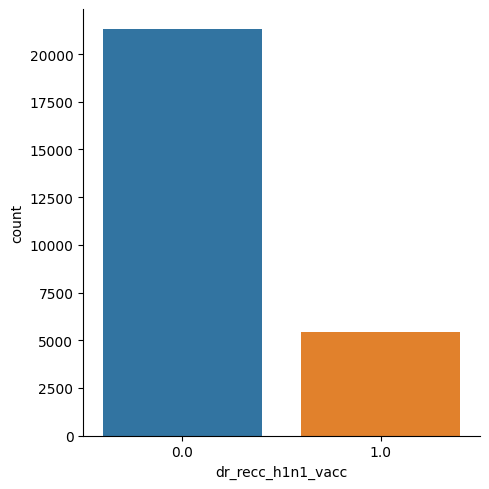

In [ ]:
sns.catplot(x='dr_recc_h1n1_vacc',kind='count',data=features)

In [ ]:
features.dr_recc_seasonal_vacc.value_counts()

0.0    18613
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

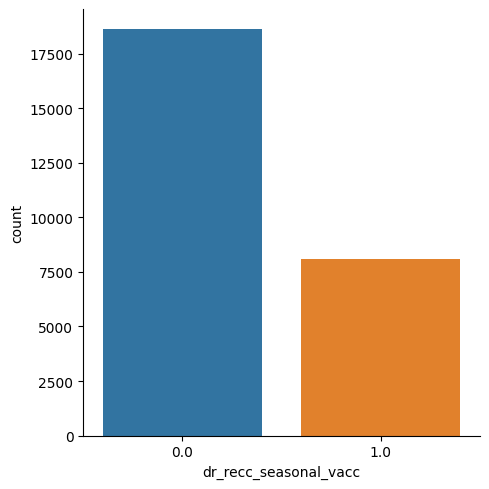

In [ ]:
sns.catplot(x='dr_recc_seasonal_vacc',kind='count',data=features)

In [ ]:
features.chronic_medic_condition .value_counts()

0.0    19417
1.0     7290
Name: chronic_medic_condition, dtype: int64

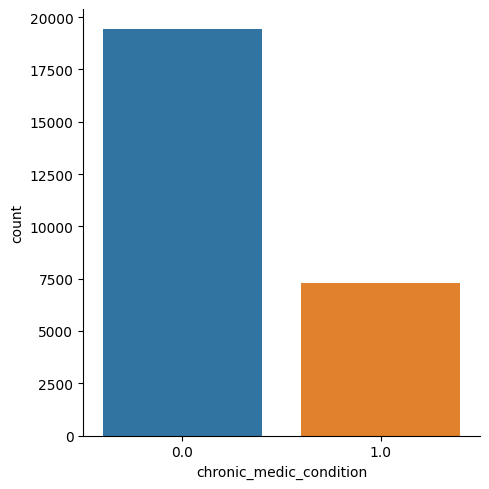

In [ ]:
sns.catplot(x='chronic_medic_condition',kind='count',data=features)

In [ ]:
features.cont_child_undr_6_mnths.value_counts()

0.0    24569
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64

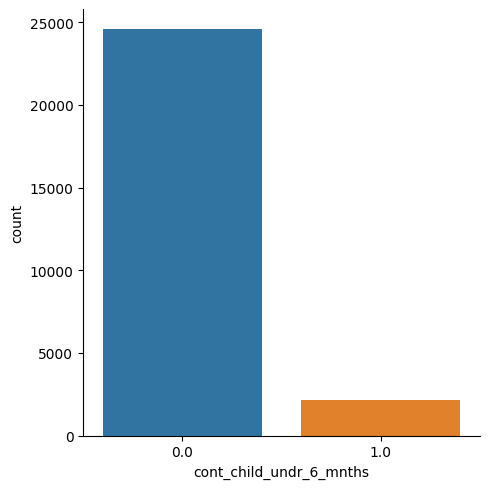

In [ ]:
sns.catplot(x='cont_child_undr_6_mnths',kind='count',data=features)

In [ ]:
features.is_health_worker.value_counts()

0.0    23808
1.0     2899
Name: is_health_worker, dtype: int64

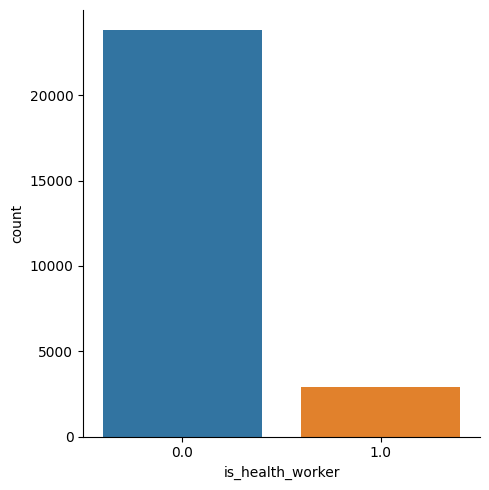

In [ ]:
sns.catplot(x='is_health_worker',kind='count',data=features)

In [ ]:
features.has_health_insur.value_counts()

1.0    24971
0.0     1736
Name: has_health_insur, dtype: int64

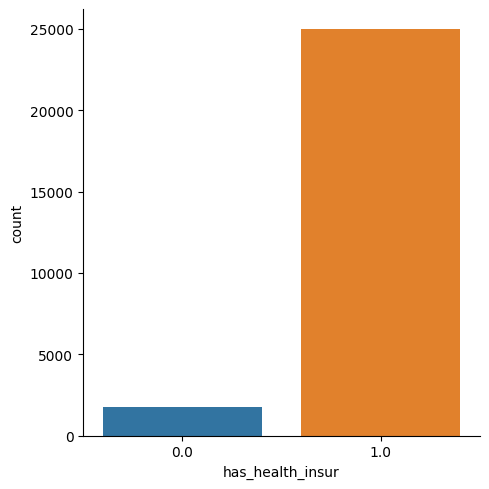

In [ ]:
sns.catplot(x='has_health_insur',kind='count',data=features)

In [ ]:
features.is_h1n1_vacc_effective.value_counts()

4.0    12074
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

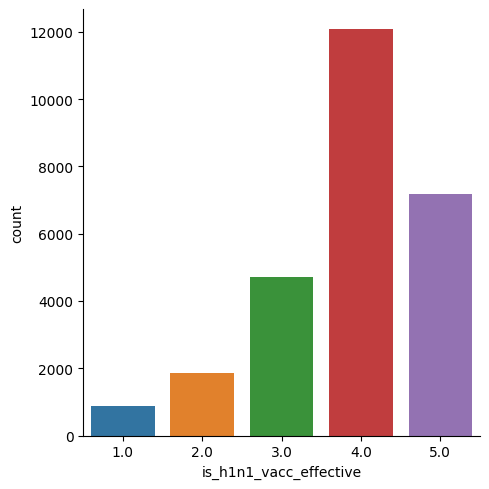

In [ ]:
sns.catplot(x='is_h1n1_vacc_effective',kind='count',data=features)

In [ ]:
features.is_h1n1_risky.value_counts()

2.0    10307
1.0     8139
4.0     5394
5.0     1750
3.0     1117
Name: is_h1n1_risky, dtype: int64

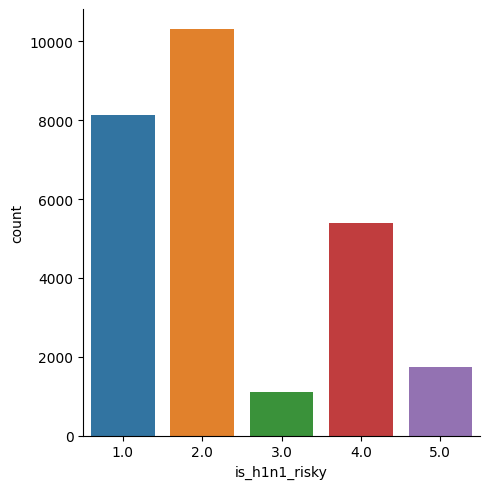

In [ ]:
sns.catplot(x='is_h1n1_risky',kind='count',data=features)

In [ ]:
features.sick_from_h1n1_vacc.value_counts()

2.0    9524
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64

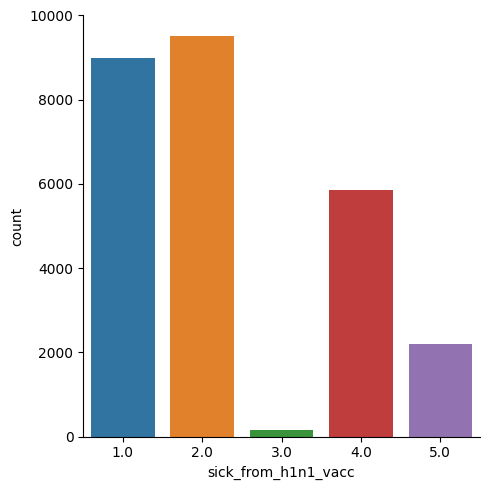

In [ ]:
sns.catplot(x='sick_from_h1n1_vacc',kind='count',data=features)

In [ ]:
features.is_seas_vacc_effective.value_counts()

4.0    12091
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: is_seas_vacc_effective, dtype: int64

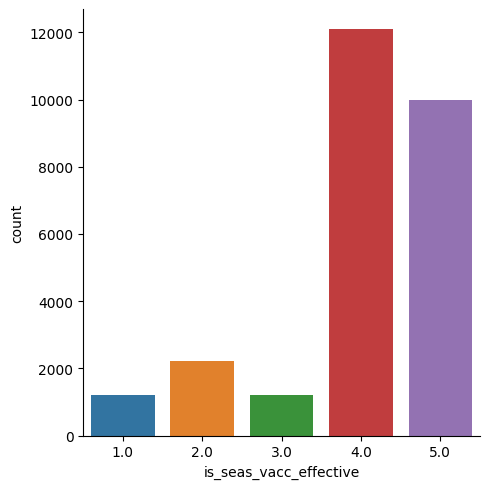

In [ ]:
sns.catplot(x='is_seas_vacc_effective',kind='count',data=features)

In [ ]:
features.is_seas_risky.value_counts()

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0    1191
Name: is_seas_risky, dtype: int64

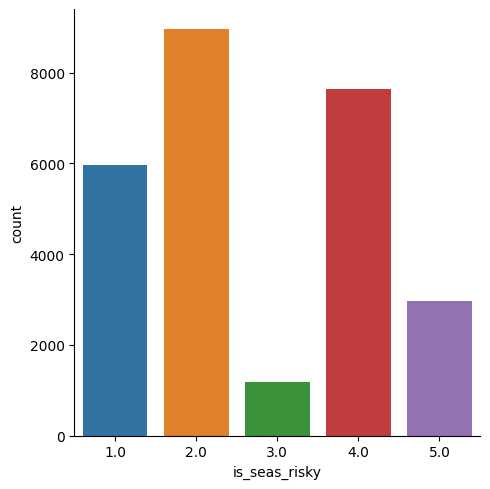

In [ ]:
sns.catplot(x='is_seas_risky',kind='count',data=features)

In [ ]:
features.sick_from_seas_vacc.value_counts()

1.0    11870
2.0     8170
4.0     4852
5.0     1721
3.0       94
Name: sick_from_seas_vacc, dtype: int64

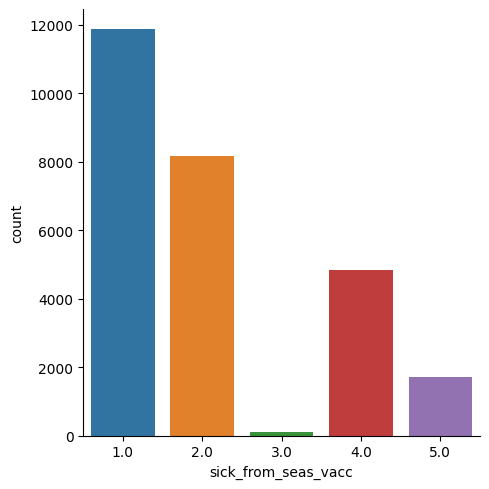

In [ ]:
sns.catplot(x='sick_from_seas_vacc',kind='count',data=features)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [ ]:
X = features
y = labels

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures = SelectKBest(score_func=chi2, k=30)

In [ ]:
fit = bestfeatures.fit(X,y)

In [ ]:
X = features
y = labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8377636340945963

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6319
           1       0.70      0.41      0.52      1694

    accuracy                           0.84      8013
   macro avg       0.78      0.68      0.71      8013
weighted avg       0.82      0.84      0.82      8013



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[6011,  308],
       [ 992,  702]])

<Axes: >

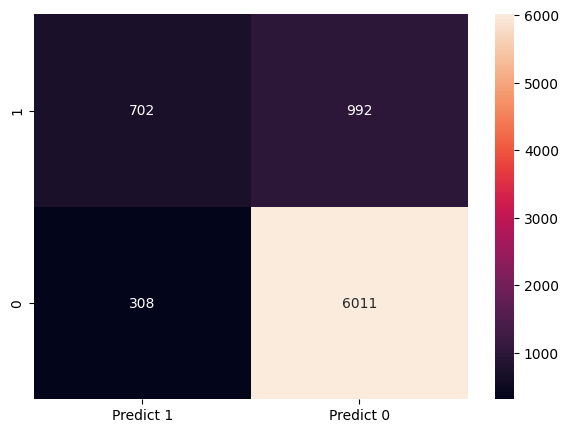

In [ ]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap (df_cm, annot=True,fmt='g')